<a href="https://colab.research.google.com/github/anup-anny/Rainfall-Prediction-Model/blob/main/Log9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [371]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
df = pd.read_excel('/content/drive/MyDrive/project case studies/Log 9/data/open-meteo-13.00N77.60E914m.xlsx')

In [373]:
df.head()

,time,weathercode (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),precipitation_sum (mm),rain_sum (mm),snowfall_sum (cm),precipitation_hours (h),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm)
0,2019-01-14,2.0,28.1,13.6,20.354166,14.4,27.3,19.570837,2019-01-14 06:14:18,2019-01-14 17:42:49,22.26,0.0,0.0,0.0,0.0,13.7,29.5,73.240500,4.840001
1,2019-01-15,1.0,27.8,12.8,20.033333,12.6,25.0,17.800001,2019-01-15 06:14:30,2019-01-15 17:43:23,22.58,0.0,0.0,0.0,0.0,14.7,33.8,73.160400,5.350000
2,2019-01-16,1.0,27.7,12.9,20.049997,13.3,26.1,18.820833,2019-01-16 06:14:39,2019-01-16 17:43:55,22.89,0.0,0.0,0.0,0.0,13.1,32.8,89.417100,5.040000
3,2019-01-17,0.0,27.8,13.3,20.279165,14.7,27.2,20.079168,2019-01-17 06:14:46,2019-01-17 17:44:27,22.36,0.0,0.0,0.0,0.0,13.2,32.0,79.524414,4.760000
4,2019-01-18,3.0,27.9,15.3,20.766668,16.1,26.8,20.612501,2019-01-18 06:14:53,2019-01-18 17:44:58,22.32,0.0,0.0,0.0,0.0,13.8,33.5,81.812860,4.910000


In [374]:
df.shape

(1097, 19)

In [375]:
df.isna().sum()

time                               0
weathercode (wmo code)             0
temperature_2m_max (°C)            0
temperature_2m_min (°C)            0
temperature_2m_mean (°C)           0
apparent_temperature_max (°C)      0
apparent_temperature_min (°C)      0
apparent_temperature_mean (°C)     0
sunrise (iso8601)                  0
sunset (iso8601)                   0
shortwave_radiation_sum (MJ/m²)    0
precipitation_sum (mm)             0
rain_sum (mm)                      0
snowfall_sum (cm)                  0
precipitation_hours (h)            0
windspeed_10m_max (km/h)           0
windgusts_10m_max (km/h)           0
winddirection_10m_dominant (°)     0
et0_fao_evapotranspiration (mm)    0
dtype: int64

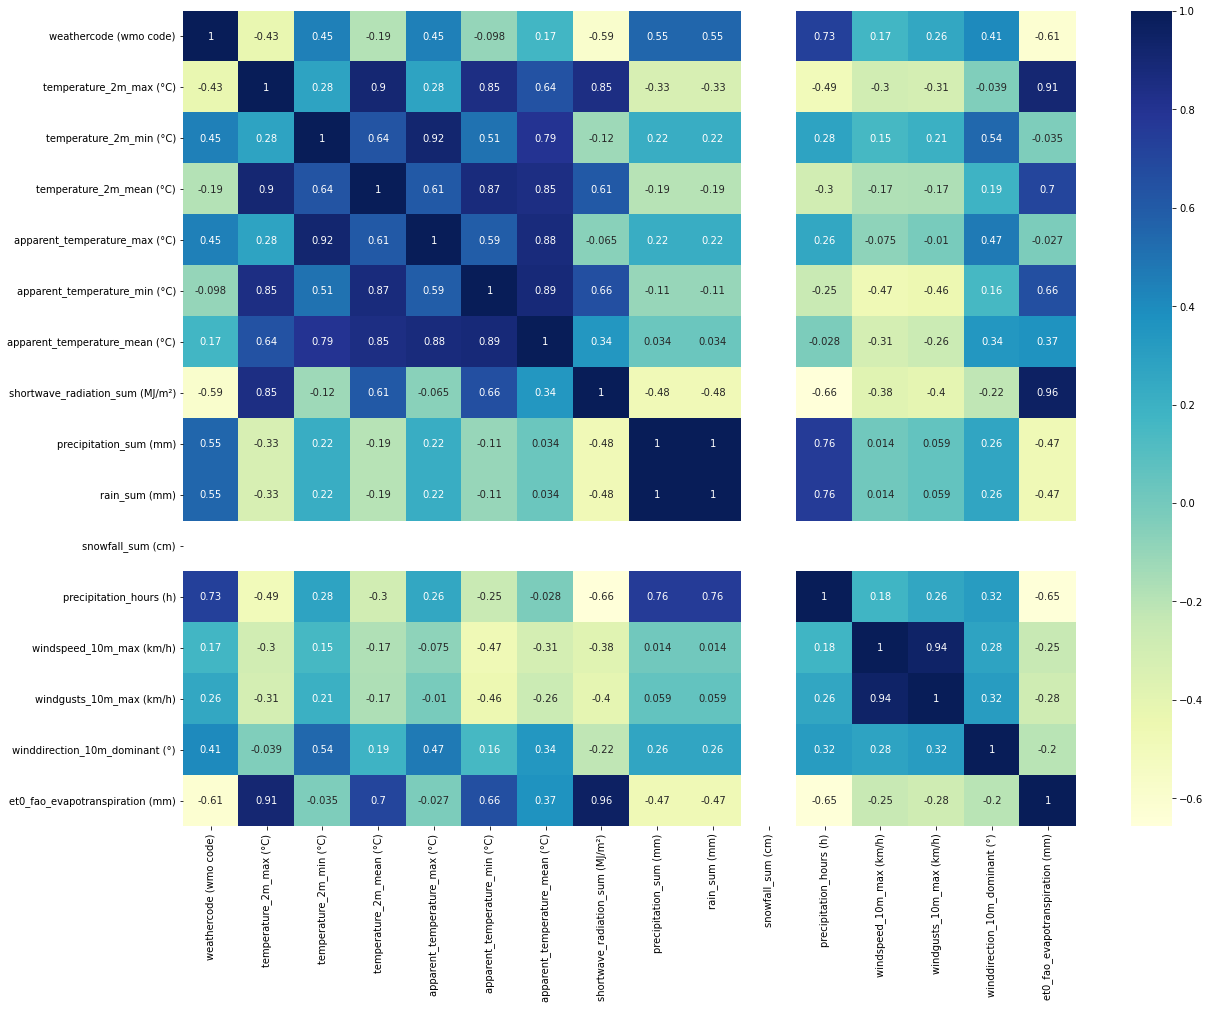

In [376]:
plt.subplots(figsize=(20,15))
correlation_map =  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [377]:
target_value = df['rain_sum (mm)']

In [378]:
corr_plot = df.corr()

In [379]:
cor_target = abs(corr_plot["rain_sum (mm)"])

relevant_train_features = cor_target[cor_target>0.20]
relevant_train_features

weathercode (wmo code)             0.549740
temperature_2m_max (°C)            0.330313
temperature_2m_min (°C)            0.221642
apparent_temperature_max (°C)      0.220716
shortwave_radiation_sum (MJ/m²)    0.476234
precipitation_sum (mm)             1.000000
rain_sum (mm)                      1.000000
precipitation_hours (h)            0.758433
winddirection_10m_dominant (°)     0.262956
et0_fao_evapotranspiration (mm)    0.469539
Name: rain_sum (mm), dtype: float64

In [380]:
X = df[['weathercode (wmo code)','temperature_2m_max (°C)','temperature_2m_min (°C)','apparent_temperature_max (°C)',
          'shortwave_radiation_sum (MJ/m²)','precipitation_hours (h)',
          'winddirection_10m_dominant (°)','et0_fao_evapotranspiration (mm)','et0_fao_evapotranspiration (mm)']]

y = df['rain_sum (mm)']

In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [382]:
y.value_counts()

0.000000     497
0.100000      34
0.200000      27
0.400000      19
0.500000      18
            ... 
11.000000      1
10.200000      1
1.300000       1
5.700000       1
4.400001       1
Name: rain_sum (mm), Length: 277, dtype: int64

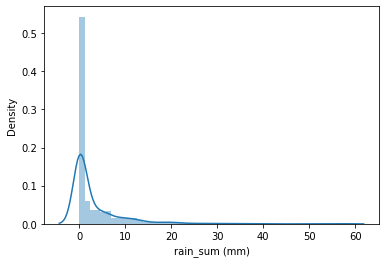

In [383]:
sns.distplot(y)

### Scaling the data

In [384]:
X = np.sqrt(X)

In [385]:
y = np.sqrt(y)

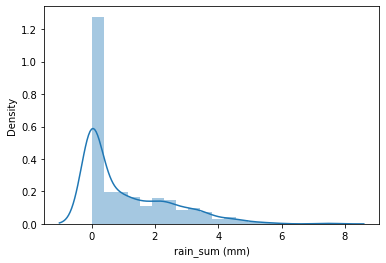

In [386]:
sns.distplot(y)

# **Model Building**

## **Linear regg**

In [387]:
# Train test spliting

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.25, random_state = 0)
print(X_train.shape)
X_test.shape

(822, 9)


(275, 9)

In [388]:
# Base model
regg = LinearRegression().fit(X_train,y_train)

# Checking score
regg.score(X_train,y_train)

0.8413694541492438

In [389]:
#Checking Coefficent
regg.coef_

array([-0.0604004 ,  1.3275402 , -0.28438913,  0.02127347,  0.35758722,
        0.9098167 ,  0.0093154 , -0.78748817, -0.78748817])

In [390]:
# Predicted Train & Test values
 
y_pred_train = regg.predict(X_train)
y_pred_test = regg.predict(X_test)

In [391]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.27220516334401645
RMSE : 0.5217328467175671
MAE : 0.3434501812273664
R2 : 0.8413694541492438
Adjusted R2 : 0.8359820016486521


In [392]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [393]:
# Calculating Performance Metrics for test data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.46398723761083766
RMSE : 0.6811660866564319
MAE : 0.39301219349864125
R2 : 0.8017962802052562
Adjusted R2 : 0.7950648331178876


In [394]:
# Making a dataset for comparing performance metrics later

dict2={'Model':'Linear regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

## **Tree based model**

In [395]:
#Initilazing the model
dt_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9, max_leaf_nodes=100)

In [396]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [397]:
#Train Test values
y_pred_train_d = dt_regressor.predict(X_train)
y_pred_test_d = dt_regressor.predict(X_test)

In [398]:
# Calculating Performance Metrics for train data

# 1. MSE
MSE = mean_squared_error((y_train), (y_pred_train_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_train), (y_pred_train_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_train), (y_pred_train_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.017245389032289744
RMSE : 0.13132170053837158
MAE : 0.06250608199858683
R2 : 0.9899500603074769
Adjusted R2 : 0.9896087416009384


In [399]:
# Making a dataset for comparing performance metrics later

dict1={'Model':'Decision tree regressor',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict1,ignore_index=True)

In [400]:
# Calculating Performance Metrics for Train data

# 1. MSE
MSE = mean_squared_error((y_test), (y_pred_test_d))
print('MSE :',MSE)

# 2. RSME
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#3. MAE
MAE = mean_absolute_error((y_test), (y_pred_test_d))
print('MAE :', MAE)

# R2
R2 = r2_score((y_test), (y_pred_test_d))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(y_test, y_pred_test_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 0.14045366242702392
RMSE : 0.3747714802743452
MAE : 0.17267053880140631
R2 : 0.9400017153592908
Adjusted R2 : 0.9379640377677195


In [401]:
# Making a dataset for comparing performance metrics later
dict2={'Model':'Decision tree regressor',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }
test_df=test_df.append(dict2,ignore_index=True)

In [402]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE    MSE   RMSE     R2  Adj_R2
Training set 1       Linear regression   0.343  0.272  0.522  0.841    0.84
Test set     0       Linear regression   0.393  0.464  0.681  0.802    0.80
             1  Decision tree regressor  0.063  0.017  0.131  0.990    0.99
             2  Decision tree regressor  0.173  0.140  0.375  0.940    0.94